In [1]:
import numpy as np
from matplotlib.pylab import *
from numpy import random
from collections import OrderedDict
import json

Most of the plots reproduce the results from the main paper, so to have a 1:1 comparison between figures, with my data, when possible the code is obtained from https://github.com/uber-research/intrinsic-dimension 

In [2]:
def figsize(width,height):
    rcParams['figure.figsize'] = (width,height)

In [3]:
def plot_perf_with_std(unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean,dim_solved_std, baseline=None, logx=False,xlim_v=None, ylim_v=None, saveas=None):
    plotfn = semilogx if logx else plot
    figsize(10, 5)
    #plt.rc('text', usetex=True)

    dir_perf = acc_mean[0]
    sub_perf = acc_mean[1:]
    
    if baseline!=None:
        dir_perf=baseline

    axhline(dir_perf, color=(0.0,0.0,0.0), ls='-', label='baseline')
    axhline(.9 * dir_perf, color=(0.0,0.0,0.0), ls='--', label='90% baseline')
    plotfn(unique_dim[1:], sub_perf, '-', mec='b', lw=3, mfc=(.7,.7,1), color=(.7,.7,1), ms=14)    
    plotfn(unique_dim[1:], sub_perf, 'o', mec='b', lw=3, mfc=(.7,.7,1), color=(.7,.7,1), ms=14)
    plotfn(dim_solved_mean, acc_solved_mean, 'o', mec='b', lw=3, mfc='b', ms=14)
    
    errorbar(unique_dim[1:],  sub_perf,  yerr=acc_solved_std, color='b',  alpha=0.5, capsize=8, elinewidth=5, markersize=8, capthick=2)
    errorbar(dim_solved_mean,  acc_solved_mean,  xerr=dim_solved_std, color='r',  alpha=1.0, capsize=8, elinewidth=5, markersize=8, capthick=4)
    if xlim_v!=None:
        xlim(xlim_v)
    if ylim_v!=None:
        ylim(ylim_v)
    xlabel('Subspace dim $d$')
    ylabel('Validation accuracy')
    tight_layout()
    legend(loc=4)
    #if saveas:
    #    savefig('%s.png' % saveas)
    #    savefig('%s.pdf' % saveas)

In [4]:
def compt_dim_int(dat, baseline=None):
    #performance with intrinsic dimension 0 (direct) 
    dir_perf = np.mean(dat[dat[:,0]==0,:],0)[1]
    #dimension and performance with intrinsic dimension > 0 (subspace)
    sub_perf = dat[dat[:,0]!=0,:]
    
    unique_dim = sorted(list(set(sub_perf[:,0])))
    perf_mean = [np.mean(dat[dat[:,0]==d,:],0)[1] for d in unique_dim]

    if baseline!=None:
        dir_perf=baseline
    for i in range(len(unique_dim)):
        if perf_mean[i]>dir_perf*.90:
            break
    return unique_dim[i], perf_mean[i]

In [5]:
def format_data(data_btsp, baseline=1.0):
    print(data_btsp)
    data_btsp = np.array(data_btsp)
    print(data_btsp.shape)

    unique_dim = sorted(list(set(data_btsp[:,0])))
    print(unique_dim)

    # bootstrap M samples
    M = 100
    acc_btrp=[]
    for d in unique_dim:
        idx_ = np.where(data_btsp[:,0]==d)[0]
        rdm_seed = np.random.randint(1, size=M) #TODO: when you have data change this to 3 to have 3 different samples for id
        acc_btrp.append([ [d, data_btsp[ idx_[i], 1]] for i in rdm_seed  ])
    acc_btrp = np.array(acc_btrp)    
    print(acc_btrp.shape)

    d_int_array, acc_int_array = np.ones(M), np.ones(M)
    for m in range(M):
        d_int_, acc_int_ = compt_dim_int(acc_btrp[:,m,:], baseline=baseline)
        d_int_array[m], acc_int_array[m] = d_int_, acc_int_
        
    print(d_int_array)

    dim_solved_mean = np.mean(d_int_array)
    dim_solved_std = np.std(d_int_array)
    print("d_int: mean="+str(dim_solved_mean) + ", std=" +str( dim_solved_std) )

    acc_solved_mean = np.mean(acc_int_array)
    acc_solved_std = np.std(acc_int_array)
    print("d_int: mean="+str(acc_solved_mean) + ", std=" +str( acc_solved_std) )

    acc_mean = np.mean(acc_btrp[:,:,1], axis=1)
    acc_std = np.std(acc_btrp[:,:,1], axis=1)
    return unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean, dim_solved_std

In [6]:
with open('results_fc200.json') as f:
    data = json.load(f)
f.close()

data_fcn200 = [[0,100]] # 0 is the dimension of the full space and 100 is the global baseline accuracy (100%)
for k,v in data.items():
    data_fcn200.append([v['intrinsic_dimension'],v['best_accuracy']])

[[0, 100], [100, 0.5833], [200, 0.7451], [300, 0.8231], [400, 0.8636], [500, 0.8832], [600, 0.902], [700, 0.9004], [650, 0.8973], [675, 0.9002], [625, 0.8982], [800, 0.9137], [900, 0.9239], [1000, 0.9282], [1100, 0.9286], [1200, 0.9339], [1300, 0.9346]]
(17, 2)
[0.0, 100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 625.0, 650.0, 675.0, 700.0, 800.0, 900.0, 1000.0, 1100.0, 1200.0, 1300.0]
(17, 100, 2)
[600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600.
 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600.
 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600.
 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600.
 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600.
 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600.
 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600.
 600. 600.]
d_int: mean=600.0, std=0.0
d_int: mean=0.9019999999999999, std=1.1102230246251565e-16


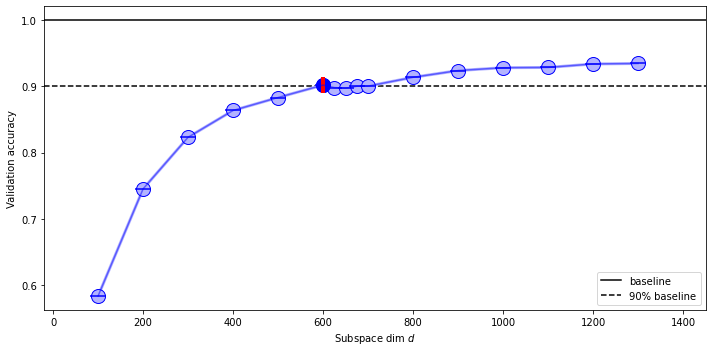

In [7]:
unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean, dim_solved_std = format_data(data_fcn200)
plot_perf_with_std(unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean, dim_solved_std, baseline=1.0, logx=False,xlim_v=[-20,1450], saveas='dim_mnist_mlp_2_200_std')

In [8]:
with open('results_lenet_mnist.json') as f:
    data = json.load(f)
f.close()

data_lenet_mnist = [] # 0 is the dimension of the full space and 100 is the global baseline accuracy (100%)
for k,v in data.items():
    data_lenet_mnist.append([v['intrinsic_dimension'],v['best_accuracy']])

FileNotFoundError: [Errno 2] No such file or directory: 'results_lenet_mnist.json'

[[10, 0.2362], [50, 0.6189], [100, 0.811], [200, 0.9228], [300, 0.9387], [500, 0.9656], [1000, 0.9764], [150, 0.8792], [400, 0.9523], [125, 0.8486], [175, 0.901], [225, 0.9295], [250, 0.9281], [275, 0.9351], [185, 0.8953], [190, 0.8937], [195, 0.9106], [205, 0.9057], [210, 0.9075], [0, 0.9892], [170, 0.9028], [165, 0.8901], [160, 0.8903], [180, 0.8931]]
(24, 2)
[0.0, 10.0, 50.0, 100.0, 125.0, 150.0, 160.0, 165.0, 170.0, 175.0, 180.0, 185.0, 190.0, 195.0, 200.0, 205.0, 210.0, 225.0, 250.0, 275.0, 300.0, 400.0, 500.0, 1000.0]
(24, 100, 2)
[170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170.
 170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170.
 170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170.
 170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170.
 170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170.
 170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170.
 170. 170. 170. 170. 170. 170. 

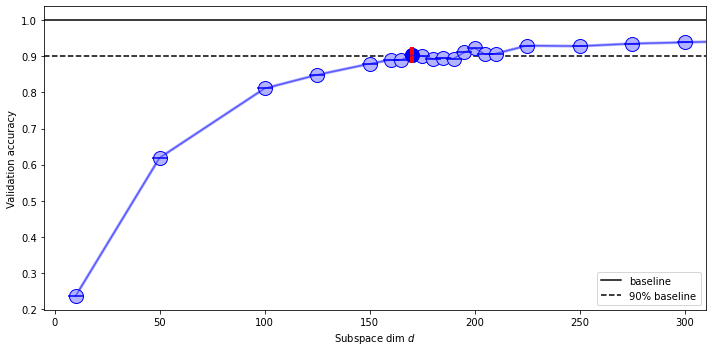

In [ ]:
unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean, dim_solved_std = format_data(data_lenet_mnist)
plot_perf_with_std(unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean,dim_solved_std, baseline=1.0, logx=False,xlim_v=[-5,310], saveas='dim_mnist_mlp_2_200_std')

In [ ]:
with open('results_lenet_cifar10.json') as f:
    data = json.load(f)
f.close()

data_lenet_cifar = [] # 0 is the dimension of the full space and 100 is the global baseline accuracy (100%)
for k,v in data.items():
    data_lenet_cifar.append([v['intrinsic_dimension'],v['best_accuracy']])

[[50, 0.239], [100, 0.2909], [200, 0.3607], [300, 0.3868], [400, 0.4212], [500, 0.4295], [600, 0.451], [700, 0.4562], [800, 0.4578], [900, 0.4694], [1000, 0.4733], [1100, 0.4861], [1200, 0.5069], [1300, 0.4913], [1400, 0.499], [1500, 0.5073], [1600, 0.5103], [1700, 0.518], [1800, 0.4972], [1900, 0.503], [2000, 0.5155], [2100, 0.5364], [2200, 0.5193], [2300, 0.5331], [2400, 0.5207], [2500, 0.5252], [2600, 0.5418], [2700, 0.5325], [2800, 0.5316], [2900, 0.5414], [3000, 0.551], [3100, 0.5355], [3200, 0.5499], [3300, 0.5409], [3400, 0.5276], [3500, 0.5289], [3600, 0.5488], [3700, 0.5599], [3800, 0.5539], [3900, 0.544], [4000, 0.5425], [4100, 0.5562], [4200, 0.5434], [4300, 0.5518], [4400, 0.5578], [4500, 0.5553], [0, 0.5725], [10, 0.1024]]
(48, 2)
[0.0, 10.0, 50.0, 100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800.0, 900.0, 1000.0, 1100.0, 1200.0, 1300.0, 1400.0, 1500.0, 1600.0, 1700.0, 1800.0, 1900.0, 2000.0, 2100.0, 2200.0, 2300.0, 2400.0, 2500.0, 2600.0, 2700.0, 2800.0, 2900.0, 3000.

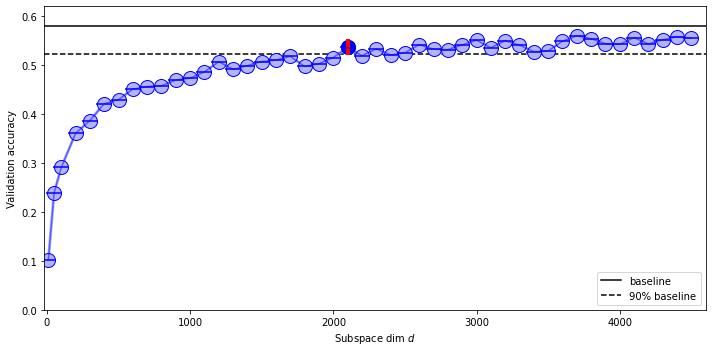

In [ ]:
unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean, dim_solved_std = format_data(data_lenet_cifar, baseline=0.58)
plot_perf_with_std(unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean,dim_solved_std, baseline=0.58, logx=False,xlim_v=[-20,4600], ylim_v=[0,0.62], saveas='dim_mnist_mlp_2_200_std')

In [ ]:
with open('results_untied_lenet_mnist.json') as f:
    data = json.load(f)
f.close()

data_untied_lenet = [] # 0 is the dimension of the full space and 100 is the global baseline accuracy (100%)
for k,v in data.items():
    data_untied_lenet.append([v['intrinsic_dimension'],v['best_accuracy']])

[[100, 0.7273], [200, 0.8412], [300, 0.8769], [400, 0.9077], [500, 0.916], [600, 0.9303], [700, 0.9376], [800, 0.9387], [900, 0.9431], [1000, 0.9463], [1100, 0.9524], [1200, 0.9498], [1300, 0.9563], [0, 0.9868], [50, 0.527], [10, 0.1758]]
(16, 2)
[0.0, 10.0, 50.0, 100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800.0, 900.0, 1000.0, 1100.0, 1200.0, 1300.0]
(16, 100, 2)
[400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400.
 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400.
 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400.
 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400.
 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400.
 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400.
 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400.
 400. 400.]
d_int: mean=400.0, std=0.0
d_int: mean=0.9077000000000003, std=3.3306690738754696e-16


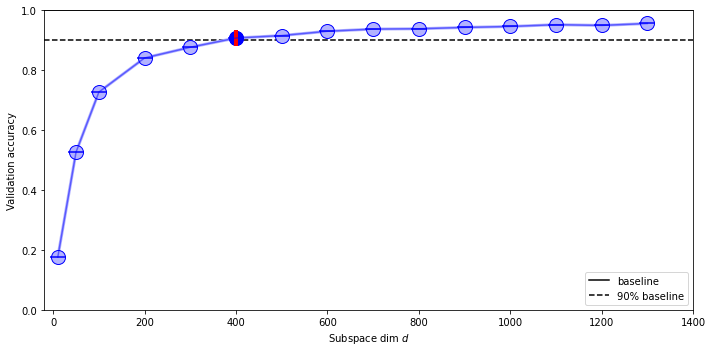

In [ ]:
unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean, dim_solved_std = format_data(data_untied_lenet, baseline=1.0)
plot_perf_with_std(unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean,dim_solved_std, baseline=1.0, logx=False,xlim_v=[-20,1400], ylim_v=[0,1.0], saveas='dim_mnist_mlp_2_200_std')

In [ ]:
with open('results_fc_lenet.json') as f:
    data = json.load(f)
f.close()

data_fc_lenet = [[0,100]] # 0 is the dimension of the full space and 100 is the global baseline accuracy (100%)
for k,v in data.items():
    data_fc_lenet.append([v['intrinsic_dimension'],v['best_accuracy']])

[[0, 100], [100, 0.5781], [200, 0.7447], [300, 0.7937]]
(4, 2)
[0.0, 100.0, 200.0, 300.0]
(4, 100, 2)
[300. 300. 300. 300. 300. 300. 300. 300. 300. 300. 300. 300. 300. 300.
 300. 300. 300. 300. 300. 300. 300. 300. 300. 300. 300. 300. 300. 300.
 300. 300. 300. 300. 300. 300. 300. 300. 300. 300. 300. 300. 300. 300.
 300. 300. 300. 300. 300. 300. 300. 300. 300. 300. 300. 300. 300. 300.
 300. 300. 300. 300. 300. 300. 300. 300. 300. 300. 300. 300. 300. 300.
 300. 300. 300. 300. 300. 300. 300. 300. 300. 300. 300. 300. 300. 300.
 300. 300. 300. 300. 300. 300. 300. 300. 300. 300. 300. 300. 300. 300.
 300. 300.]
d_int: mean=300.0, std=0.0
d_int: mean=0.7937000000000001, std=1.1102230246251565e-16


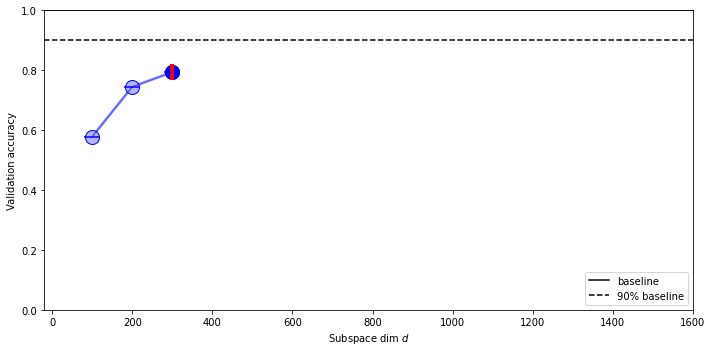

In [ ]:
unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean, dim_solved_std = format_data(data_fc_lenet, baseline=1.0)
plot_perf_with_std(unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean,dim_solved_std, baseline=1.0, logx=False,xlim_v=[-20,1600], ylim_v=[0,1.0], saveas='dim_mnist_mlp_2_200_std')

In [ ]:
with open('results_fcn_cifar10.json') as f:
    data = json.load(f)
f.close()

data_fcn_cifar10 = [] # 0 is the dimension of the full space and 100 is the global baseline accuracy (100%)
for k,v in data.items():
    data_fcn_cifar10.append([v['intrinsic_dimension'],v['best_accuracy']])

[[100, 0.2591], [200, 0.2973], [300, 0.3263], [300, 0.3047], [400, 0.3404], [400, 0.3336], [500, 0.3484], [500, 0.3495], [500, 0.3284], [600, 0.3603], [600, 0.3534], [600, 0.3133], [700, 0.372], [700, 0.357], [700, 0.3418], [800, 0.3747], [800, 0.3692], [800, 0.3422], [900, 0.3825], [900, 0.3746], [900, 0.3457], [1000, 0.3916], [1000, 0.383], [1000, 0.3626], [1100, 0.4004], [1100, 0.39], [1100, 0.3666], [1200, 0.4075], [1200, 0.3974], [1200, 0.3784], [1300, 0.4027], [1300, 0.3956], [1300, 0.3813], [50, 0.2225], [100, 0.264], [200, 0.3182], [300, 0.3357], [400, 0.3562], [500, 0.3647], [600, 0.3736], [700, 0.3842], [800, 0.3849], [900, 0.398], [50, 0.2277], [100, 0.268], [200, 0.3192], [300, 0.3417], [400, 0.3645], [1400, 0.4253], [2000, 0.4002], [3000, 0.4133], [4000, 0.4267], [5000, 0.4351], [6000, 0.477], [7000, 0.4866], [8000, 0.488], [8500, 0.4872], [9000, 0.4894], [9500, 0.4829], [10000, 0.4826], [0, 0.5256], [9500, 0.4837], [10000, 0.4892]]
(63, 2)
[0.0, 50.0, 100.0, 200.0, 300.0,

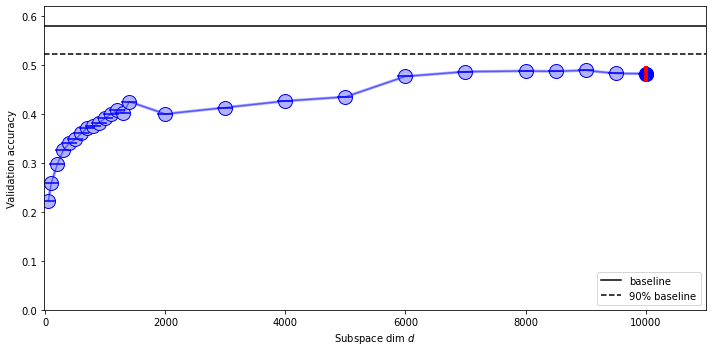

In [ ]:
unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean, dim_solved_std = format_data(data_fcn_cifar10, baseline=0.58)
plot_perf_with_std(unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean,dim_solved_std, baseline=0.58, logx=False,xlim_v=[-20,11000], ylim_v=[0,0.62], saveas='dim_mnist_mlp_2_200_std')

In [ ]:
import pandas as pd

with open('results_fcn_mnist.json') as f:
    data = json.load(f)
f.close()

df = pd.DataFrame.from_dict(data).transpose()
df

,number_parameter,hidden_dimension,number_layers,intrinsic_dimension,epoch,validation_accuracy,learning_rate,best_epoch,best_accuracy
fcn_model_h50_id50_lay0_lr0.05,39760.0,50.0,0.0,50.0,100.0,0.4479,0.050,58.0,0.4623
fcn_model_h50_id50_lay0_lr0.02,39760.0,50.0,0.0,50.0,100.0,0.4529,0.020,1.0,0.4636
fcn_model_h50_id50_lay0_lr0.01,39760.0,50.0,0.0,50.0,100.0,0.4561,0.010,4.0,0.4627
fcn_model_h50_id50_lay0_lr0.005,39760.0,50.0,0.0,50.0,100.0,0.4565,0.005,8.0,0.4642
fcn_model_h50_id50_lay0_lr0.001,39760.0,50.0,0.0,50.0,100.0,0.4585,0.001,44.0,0.4653
...,...,...,...,...,...,...,...,...,...
fcn_model_h200_id500_lay1_lr0.001,199210.0,200.0,1.0,500.0,100.0,0.8807,0.001,99.0,0.8807
fcn_model_h200_id600_lay1_lr0.001,199210.0,200.0,1.0,600.0,100.0,0.8934,0.001,92.0,0.8934
fcn_model_h200_id700_lay1_lr0.001,199210.0,200.0,1.0,700.0,100.0,0.9018,0.001,100.0,0.9018
fcn_model_h200_id800_lay1_lr0.001,199210.0,200.0,1.0,800.0,100.0,0.9034,0.001,100.0,0.9034


In [ ]:
import plotly.express as px
fig = px.scatter_matrix(df,
    dimensions=["number_parameter", "hidden_dimension", "number_layers", "learning_rate", "best_accuracy"],
    color="intrinsic_dimension",)
fig.update_layout(
    dragmode='select',
    height=1000,
    hovermode='closest',
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [ ]:
import plotly.graph_objects as go

sizeref = max(df["hidden_dimension"])/(30**2)

fig = go.Figure()

fig.add_trace(go.Scatter(
    y=df["learning_rate"],
    x=df["best_accuracy"],
    mode='markers',
    marker=dict(
        color=df["intrinsic_dimension"], size=df["hidden_dimension"],
        sizemode = 'area', sizeref=sizeref,
        sizemin=2, showscale = True
        ),
))
fig.update_yaxes(type="log")
fig.show()